
# 1 bit Compressive Sensing

This example demonstrates following features
- Making 1-bit quantized compressive measurements of a sparse signal 
- Recovering the original signal using the BIHT (Binary Iterative Hard Thresholding) algorithm.


Let's import necessary libraries 



In [1]:
import jax.numpy as jnp
from jax.numpy.linalg import norm

import matplotlib as mpl
import matplotlib.pyplot as plt

import cr.nimble as cnb
import cr.sparse as crs
import cr.sparse.dict as crdict
import cr.sparse.data as crdata
import cr.sparse.cs.cs1bit as cs1bit

from cr.nimble.dsp import (
    build_signal_from_indices_and_values
)

## Setup



In [2]:
# Number of measurements
M = 256
# Ambient dimension
N = 512
# Sparsity level
K = 4

## Sensing Matrix



2.3900623


Text(0.5, 1.0, '$\\Phi$')

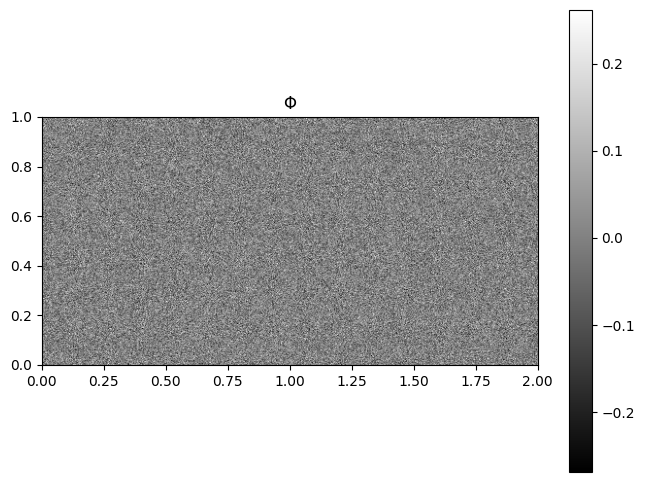

In [3]:
Phi = crdict.gaussian_mtx(cnb.KEYS[0], M, N, normalize_atoms=False)
# frame bound
s0 = crdict.upper_frame_bound(Phi)
print(s0)
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(Phi, extent=[0, 2, 0, 1])
plt.gray()
plt.colorbar()
plt.title(r'$\Phi$')

## K-sparse signal



[250 322 453 511]


<StemContainer object of 3 artists>

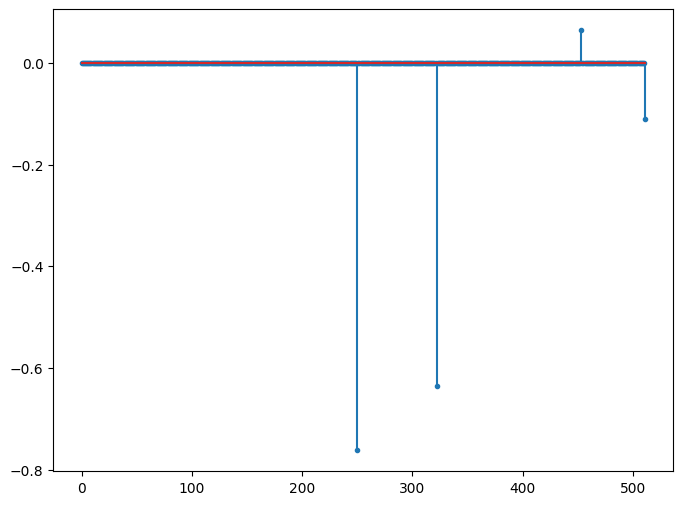

In [4]:
x, omega = crdata.sparse_normal_representations(cnb.KEYS[1], N, K)
# normalize signal
x = x / norm(x)
# the support indices
print(omega)
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.stem(x, markerfmt='.')

## Measurement process
measurements



[-1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.
  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1.
 -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.
  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.
  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.
  1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1

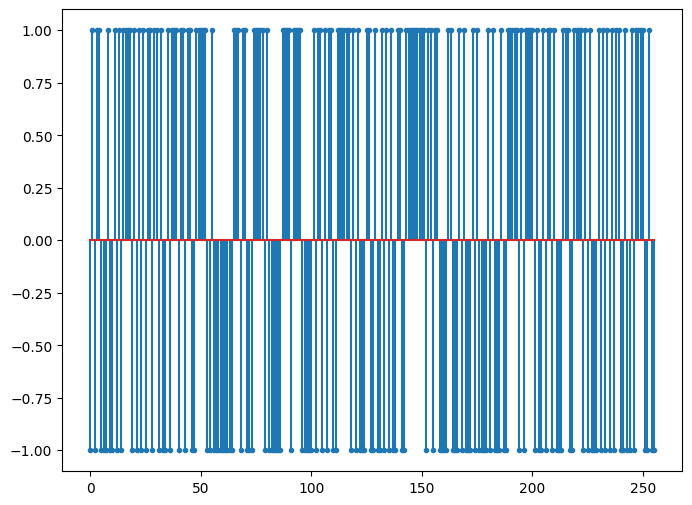

In [5]:
y = cs1bit.measure_1bit(Phi, x)
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.stem(y, markerfmt='.')
print(y)

## Signal Reconstruction using BIHT
solver step-size



In [6]:
tau = 0.98 * s0
# solution
sol = cs1bit.biht_jit(Phi, y, K, tau)

reconstructed signal



In [7]:
x_rec = build_signal_from_indices_and_values(N, sol.I, sol.x_I)

## Verification



[250 322 453 511]


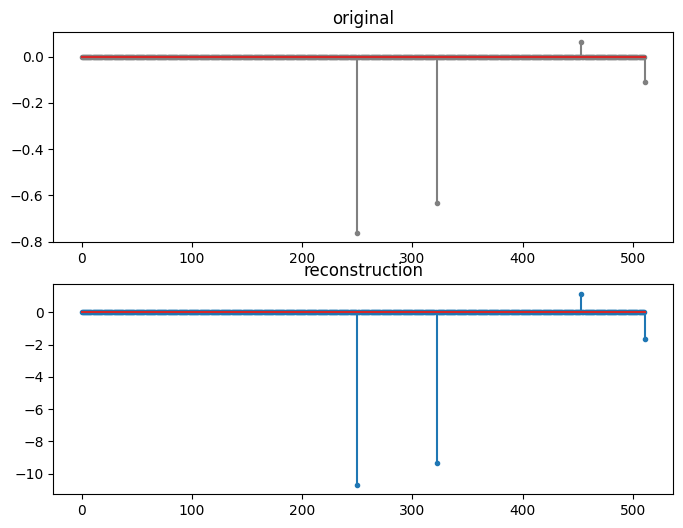

In [8]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.title('original')
plt.stem(x, markerfmt='.', linefmt='gray')
plt.subplot(212)
plt.stem(x_rec, markerfmt='.')
plt.title('reconstruction')

# recovered support
I = jnp.sort(sol.I)
print(I)

check if the support is recovered correctly



In [9]:
print(jnp.array_equal(omega, I))
# normalize recovered signal
x_rec = x_rec / norm(x_rec)
# the norm of error
print(norm(x - x_rec))

True
0.028019236
